In [1]:
# https://www.kaggle.com/ratnesh88/indian-census-data-exploration
# https://www.kaggle.com/ccentola/adult-census-income-analysis

In [2]:
!pip install basemap

  Could not find a version that satisfies the requirement basemap (from versions: )
No matching distribution found for basemap


In [3]:
import mpl_toolkits

In [30]:
# Load librariesimport mpl_toolkits
from __future__ import division
import pandas as pd
from itertools import groupby
import operator
import matplotlib.pyplot as plt
import matplotlib.cm
import mpl_toolkits
# from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np
import seaborn as sns
import math
import pandas_profiling
% matplotlib inline

UsageError: Line magic function `%` not found.


In [5]:
df=pd.read_excel("Dataset.xlsx")
df


,X,State,District,Persons,Males,Females,Growth..1991...2001.,Rural,Urban,Scheduled.Caste.population,...,Medical.facility,Primary.Health.Centre,Primary.Health.Sub.Centre,Post..telegraph.and.telephone.facility,Bus.services,Paved.approach.road,Mud.approach.road,Permanent.House,Semi.permanent.House,Temporary.House
0,1,AN,"District Andamans (01), Andaman & Nicobar Isla...",314084,170319,143765,30.14,197886,116198,-,...,102,16,78,161.0,187,201,243,28.7,39.1,32.0
1,2,AN,"District Nicobars (02), Andaman & Nicobar Isla...",42068,22653,19415,7.19,42068,-,-,...,38,4,31,36.0,49,51,111,28.0,33.3,38.7
2,3,Andhra,"District Adilabad (01), Andhra Pradesh (28)",2488003,1250958,1237045,19.06,1827986,NaN,NaN,...,976,61,432,558.0,814,979,544,53.0,39.9,7.0
3,4,Andhra,"District Nizamabad (02), Andhra Pradesh (28)",2345685,1162905,1182780,14.98,1920947,NaN,NaN,...,614,50,330,602.0,746,760,82,52.8,37.6,9.6
4,5,Andhra,"District Karimnagar (03), Andhra Pradesh (28)",3491822,1747968,1743854,14.47,2813010,NaN,NaN,...,863,70,475,795.0,912,823,218,55.8,36.4,7.8
5,6,Andhra,"District Medak (04), Andhra Pradesh (28)",2670097,1352446,1317651,17.29,2286573,NaN,NaN,...,659,58,360,803.0,1007,978,239,49.3,42.6,8.1
6,7,Andhra,"District Hyderabad (05), Andhra Pradesh (28)",3829753,1981173,1848580,17.18,-,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,11.9,2.0
7,8,Andhra,"District Rangareddi (06), Andhra Pradesh (28)",3575064,1839227,1735837,37.41,1637227,NaN,NaN,...,422,30,225,638.0,713,731,122,78.6,18.2,3.1
8,9,Andhra,"District Mahbubnagar (07), Andhra Pradesh (28)",3513934,1782340,1731594,13.97,3142579,NaN,NaN,...,881,76,517,1044.0,1230,1127,340,39.9,34.7,25.4
9,10,Andhra,"District Nalgonda (08), Andhra Pradesh (28)",3247982,1651990,1595992,13.55,2815304,NaN,NaN,...,872,69,493,826.0,1020,934,185,50.1,26.9,23.0


In [ ]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="Census2001_preprocessing.html")

In [6]:
df.describe()

,X,Persons,Males,Females,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Persons..literate,Males..Literate,...,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Primary.school,Post..telegraph.and.telephone.facility,Permanent.House,Semi.permanent.House,Temporary.House
count,590.000000,5.900000e+02,5.900000e+02,5.900000e+02,5.870000e+02,587.000000,587.000000,587.000000,5.900000e+02,5.900000e+02,...,482.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,590.000000,590.000000,590.000000
mean,295.500000,1.732902e+06,8.966605e+05,8.362419e+05,3.258233e+05,5.436116,934.800681,929.388416,9.442850e+05,5.670726e+05,...,41223.562241,1016.451557,1009.671280,992.044983,774.759516,796.794118,419.726644,47.624644,32.856000,19.490051
std,170.462606,1.329998e+06,6.934142e+05,6.381679e+05,2.666372e+05,0.846952,62.718746,47.554772,8.437970e+05,4.845297e+05,...,52626.613978,816.524396,809.966443,801.088455,611.197664,555.064067,331.545869,24.603409,21.587237,20.760061
min,1.000000,3.139400e+04,1.589300e+04,1.478300e+04,6.054000e+03,4.000000,591.000000,766.000000,1.342400e+04,8.733000e+03,...,605.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.600000,1.000000,0.100000
25%,148.250000,8.127185e+05,4.207508e+05,3.890438e+05,1.559300e+05,5.000000,895.000000,912.000000,4.144205e+05,2.541402e+05,...,17390.250000,467.750000,466.250000,442.750000,311.500000,397.500000,172.500000,28.225000,14.600000,3.400000
50%,295.500000,1.487712e+06,7.706160e+05,7.133320e+05,2.686090e+05,5.000000,938.000000,942.000000,7.693050e+05,4.681805e+05,...,29149.000000,891.000000,886.500000,881.500000,645.500000,758.500000,354.500000,47.550000,28.850000,10.750000
75%,442.750000,2.395986e+06,1.248934e+06,1.142946e+06,4.337020e+05,6.000000,974.500000,962.000000,1.220172e+06,7.617885e+05,...,47965.000000,1386.000000,1376.500000,1368.750000,1086.750000,1133.750000,580.750000,66.300000,47.175000,30.175000
max,590.000000,9.610788e+06,4.916370e+06,4.694418e+06,1.838426e+06,8.000000,1147.000000,1035.000000,6.617264e+06,3.853376e+06,...,704002.000000,10548.000000,10475.000000,10455.000000,4835.000000,6133.000000,2346.000000,98.600000,95.000000,85.600000


In [7]:
for col in (df.columns):
    print(col)

X
State
District
Persons
Males
Females
Growth..1991...2001.
Rural
Urban
Scheduled.Caste.population
Percentage...SC.to.total
Number.of.households
Household.size..per.household.
Sex.ratio..females.per.1000.males.
Sex.ratio..0.6.years.
Scheduled.Tribe.population
Percentage.to.total.population..ST.
Persons..literate
Males..Literate
Females..Literate
Persons..literacy.rate
Males..Literatacy.Rate
Females..Literacy.Rate
Total.Educated
Data.without.level
Below.Primary
Primary
Middle
Matric.Higher.Secondary.Diploma
Graduate.and.Above
X0...4.years
X5...14.years
X15...59.years
X60.years.and.above..Incl..A.N.S..
Total.workers
Main.workers
Marginal.workers
Non.workers
SC.1.Name
SC.1.Population
SC.2.Name
SC.2.Population
SC.3.Name
SC.3.Population
Religeon.1.Name
Religeon.1.Population
Religeon.2.Name
Religeon.2.Population
Religeon.3.Name
Religeon.3.Population
ST.1.Name
ST.1.Population
ST.2.Name
ST.2.Population
ST.3.Name
ST.3.Population
Imp.Town.1.Name
Imp.Town.1.Population
Imp.Town.2.Name
Imp.Town.2.P

In [8]:
print(df.groupby('State').size())

State
AN                   2
Andhra              22
ArunachalPradesh    13
Assam               23
Bihar               37
CG                  16
Chandigarh           1
D_D                  2
D_N_H                1
Delhi                9
Goa                  2
Gujarat             25
HP                  12
Haryana             19
JK                  14
Jharkhand           18
Karnataka           27
Kerala              14
Lakshdweep           1
MP                  45
Maharashtra         35
Manipur              8
Meghalya             7
Mizoram              8
Nagaland             8
Orrisa              29
Pondicherry          4
Punjab              17
Rajasthan           32
Sikkim               4
TN                  30
Tripura              4
UP                  70
Uttranchal          13
WB                  18
dtype: int64


Text(0.5, 1.0, 'Cities per state')

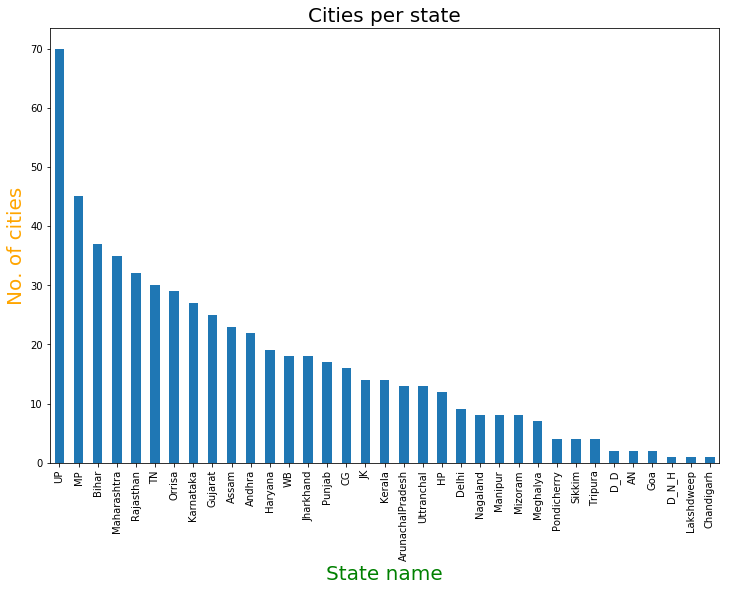

In [9]:
plt.figure(figsize=(12,8))
count =df['State'].value_counts()
count.plot("bar")
plt.xlabel("State name",size=20,color='g')
plt.ylabel("No. of cities", size=20,color='orange')
plt.title("Cities per state", size= 20)

In [10]:
person=df['Persons']
temp = df.groupby('State').sum()
# print(temp.columns)
temp

,X,Persons,Males,Females,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Persons..literate,Males..Literate,...,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Primary.school,Post..telegraph.and.telephone.facility,Permanent.House,Semi.permanent.House,Temporary.House
State,,,,,,,,,,,,,,,,,,,,,
AN,3,356152,192972,163180,78242.0,9.0,1701.0,1895.0,253135,146831,...,6787.0,501.0,500.0,456.0,329.0,238.0,197.0,56.70,72.40,70.70
Andhra,297,71308587,36067773,35240814,15801644.0,97.0,21536.0,21114.0,37126595,21940112,...,1776596.0,25290.0,25264.0,23794.0,25275.0,23702.0,16383.0,1189.50,502.60,507.30
ArunachalPradesh,403,1097968,579941,518027,215574.0,66.0,11564.0,12592.0,484785,303281,...,0.0,3863.0,3862.0,3185.0,1652.0,1575.0,328.0,269.60,248.00,781.00
Assam,1127,26655528,13777037,12878491,4914823.0,127.0,21499.0,22152.0,14015354,8188697,...,275723.0,25124.0,25123.0,24067.0,17037.0,21283.0,5818.0,420.40,694.10,1184.90
Bihar,2923,82998509,43243795,39754714,13744130.0,228.0,33981.0,34837.0,31109577,20644376,...,650793.0,39032.0,39032.0,38935.0,14135.0,28330.0,10157.0,1468.10,1039.50,1192.30
CG,1688,20833803,10474218,10359585,4091551.0,80.0,15885.0,15623.0,11173149,6711395,...,261183.0,19744.0,19468.0,19379.0,16884.0,18073.0,4252.0,353.60,1195.60,50.80
Chandigarh,114,900635,506938,393697,206465.0,4.0,777.0,844.0,643245,382686,...,16218.0,23.0,23.0,23.0,23.0,18.0,23.0,89.80,7.00,3.20
D_D,231,158204,92512,65692,35686.0,9.0,1709.0,1865.0,107600,70992,...,0.0,23.0,23.0,23.0,23.0,22.0,22.0,188.80,9.40,1.90
D_N_H,126,220490,121666,98824,45586.0,5.0,812.0,979.0,103904,72149,...,0.0,70.0,69.0,69.0,69.0,69.0,44.0,45.70,51.60,2.60


([<matplotlib.patches.Wedge at 0x2f68cfba20>,
 [Text(1.0999024255200938, 0.014651086478982688, 'AN'),
  Text(1.060417812769112, 0.2924278754872266, 'Andhra'),
  Text(0.9557817346590639, 0.5445009418652192, 'ArunachalPradesh'),
  Text(0.9010843543334618, 0.6309096499305177, 'Assam'),
  Text(0.7132461038433232, 0.8374246206986751, 'Bihar'),
  Text(0.46884086345064435, 0.9950820291608398, 'CG'),
  Text(0.2992837292956708, 1.0585033062673332, 'Chandigarh'),
  Text(0.2209812334250774, 1.0775747280230414, 'D_D'),
  Text(0.19678082855849757, 1.0822556562623413, 'D_N_H'),
  Text(0.053064554178712885, 1.0987193240722648, 'Delhi'),
  Text(-0.12867986504991033, 1.0924474780650726, 'Goa'),
  Text(-0.34524282571072296, 1.0444172496159165, 'Gujarat'),
  Text(-0.5357835095772877, 0.9606955974006776, 'HP'),
  Text(-0.647936719701926, 0.8889195729996656, 'Haryana'),
  Text(-0.7636105586677218, 0.7917694833038023, 'JK'),
  Text(-0.884052431037648, 0.6545619139366611, 'Jharkhand'),
  Text(-1.021956796793

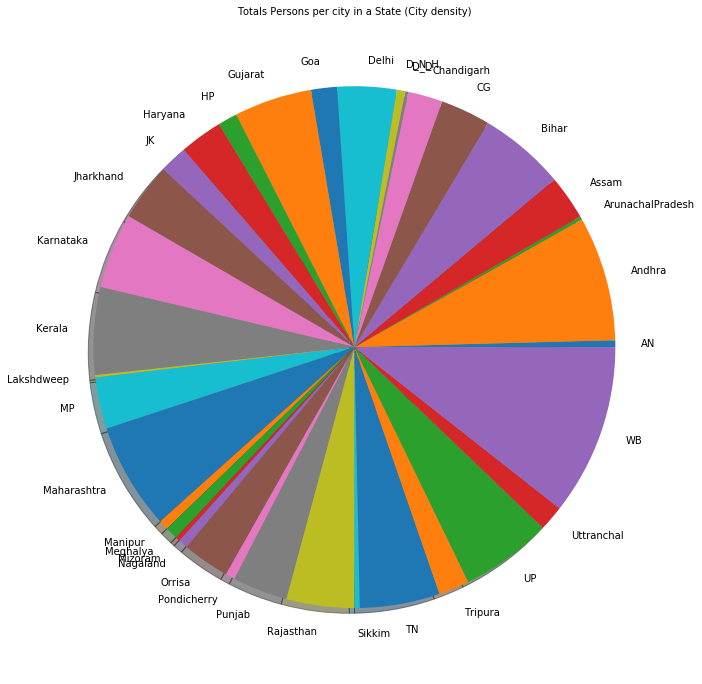

In [11]:
count= count.reindex(sorted(count.index))
#print(count)
density =temp['Persons']/count.values/10**5
plt.figure(figsize=(12,12))
plt.title("Totals Persons per city in a State (City density)", size= 10)

plt.pie(density.values,labels=density.index, shadow=True)

In [ ]:
'''
Calculating state wise literacy rates
'''

# Group the data state-wise
states_group = df.groupby(by = "State")

# List for storing tuples which contain state-name and its corresponding literacy rate
literacy_rate = []

# Iterate through each group (a group has rows with the same state-name throughout the group)
# Here, key contains 'State name' and group contains all the corresponding rows
for key , group in states_group:
    # Total population and total literate population across the state
    total_state_pop = 0
    total_literate_pop = 0
    # Iterate through all the rows of the group to get total state population and total literate state population
    for row in group.iterrows():
        total_state_pop += (int)(row[1][3]) # 3 is the index of column 'Population'
        total_literate_pop += (int)(row[1][23]) # 23 is the index of column 'Literate'
    
    # Calculate literacy rate for the state
    rate = (total_literate_pop/total_state_pop)*100
    # Store the result as a tuple in the list literacy_rate, contaning pairs of state names and literacy rates
    literacy_rate.append((key,rate))
    
print ("Statewise literacy rates : \n")
print (literacy_rate)

In [ ]:
'''
STEP 2 : CREATING A MAP
'''
# Create figure 
fig, ax = plt.subplots()
# Create a map with the coordinates determined by the Bounding Box tool
m = Basemap(projection='merc',lat_0=54.5, lon_0=-4.36,llcrnrlon=68.1, llcrnrlat= 6.5, urcrnrlon=97.4, urcrnrlat=35.5)
# Draw map boundary and set the color
m.drawmapboundary(fill_color='#46bcec')
# Fill continents and lakes
m.fillcontinents(color='#f2f2f2',lake_color='#46bcec')
# Draw coast lines
m.drawcoastlines()

In [12]:
temp

,X,Persons,Males,Females,Number.of.households,Household.size..per.household.,Sex.ratio..females.per.1000.males.,Sex.ratio..0.6.years.,Persons..literate,Males..Literate,...,Imp.Town.3.Population,Total.Inhabited.Villages,Drinking.water.facilities,Safe.Drinking.water,Electricity..Power.Supply.,Primary.school,Post..telegraph.and.telephone.facility,Permanent.House,Semi.permanent.House,Temporary.House
State,,,,,,,,,,,,,,,,,,,,,
AN,3,356152,192972,163180,78242.0,9.0,1701.0,1895.0,253135,146831,...,6787.0,501.0,500.0,456.0,329.0,238.0,197.0,56.70,72.40,70.70
Andhra,297,71308587,36067773,35240814,15801644.0,97.0,21536.0,21114.0,37126595,21940112,...,1776596.0,25290.0,25264.0,23794.0,25275.0,23702.0,16383.0,1189.50,502.60,507.30
ArunachalPradesh,403,1097968,579941,518027,215574.0,66.0,11564.0,12592.0,484785,303281,...,0.0,3863.0,3862.0,3185.0,1652.0,1575.0,328.0,269.60,248.00,781.00
Assam,1127,26655528,13777037,12878491,4914823.0,127.0,21499.0,22152.0,14015354,8188697,...,275723.0,25124.0,25123.0,24067.0,17037.0,21283.0,5818.0,420.40,694.10,1184.90
Bihar,2923,82998509,43243795,39754714,13744130.0,228.0,33981.0,34837.0,31109577,20644376,...,650793.0,39032.0,39032.0,38935.0,14135.0,28330.0,10157.0,1468.10,1039.50,1192.30
CG,1688,20833803,10474218,10359585,4091551.0,80.0,15885.0,15623.0,11173149,6711395,...,261183.0,19744.0,19468.0,19379.0,16884.0,18073.0,4252.0,353.60,1195.60,50.80
Chandigarh,114,900635,506938,393697,206465.0,4.0,777.0,844.0,643245,382686,...,16218.0,23.0,23.0,23.0,23.0,18.0,23.0,89.80,7.00,3.20
D_D,231,158204,92512,65692,35686.0,9.0,1709.0,1865.0,107600,70992,...,0.0,23.0,23.0,23.0,23.0,22.0,22.0,188.80,9.40,1.90
D_N_H,126,220490,121666,98824,45586.0,5.0,812.0,979.0,103904,72149,...,0.0,70.0,69.0,69.0,69.0,69.0,44.0,45.70,51.60,2.60


In [13]:
temp["standardized_persons"] = temp["Persons"].divide(other=150000)
temp["standardized_males"] = temp["Males"].divide(other=150000)
temp["standardized_females"] = temp["Females"].divide(other=150000)

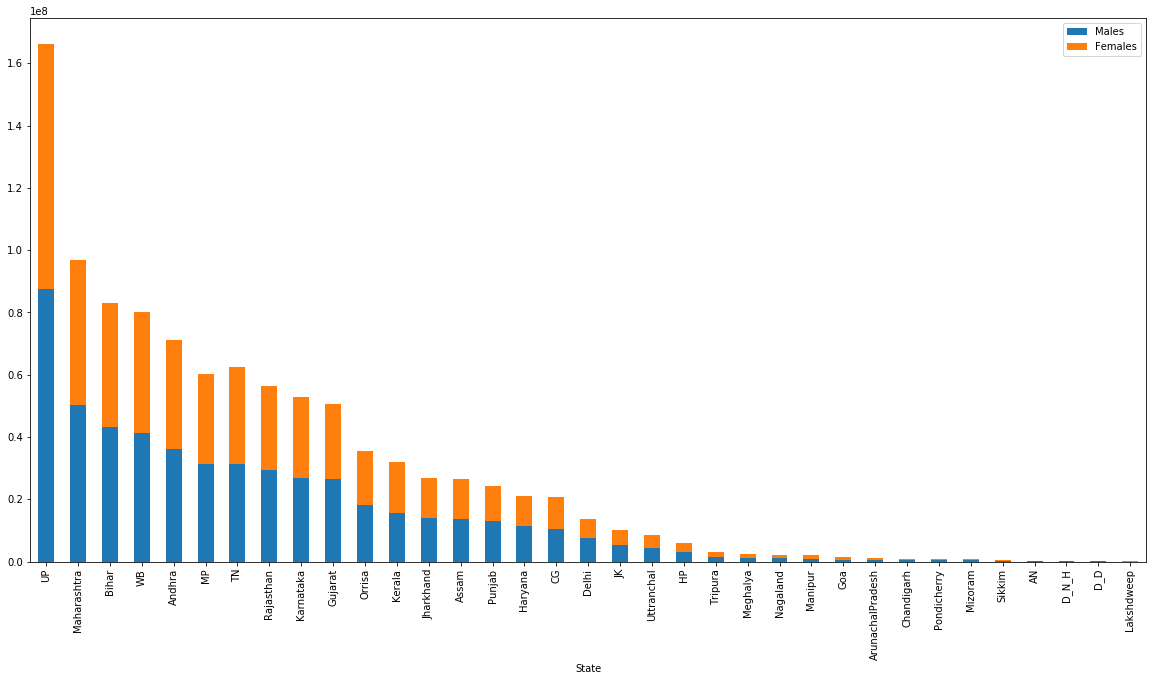

In [18]:
temp[["Males","Females"]].sort_values(by="Males",ascending=False).plot.bar(stacked=True,figsize=(20,10))

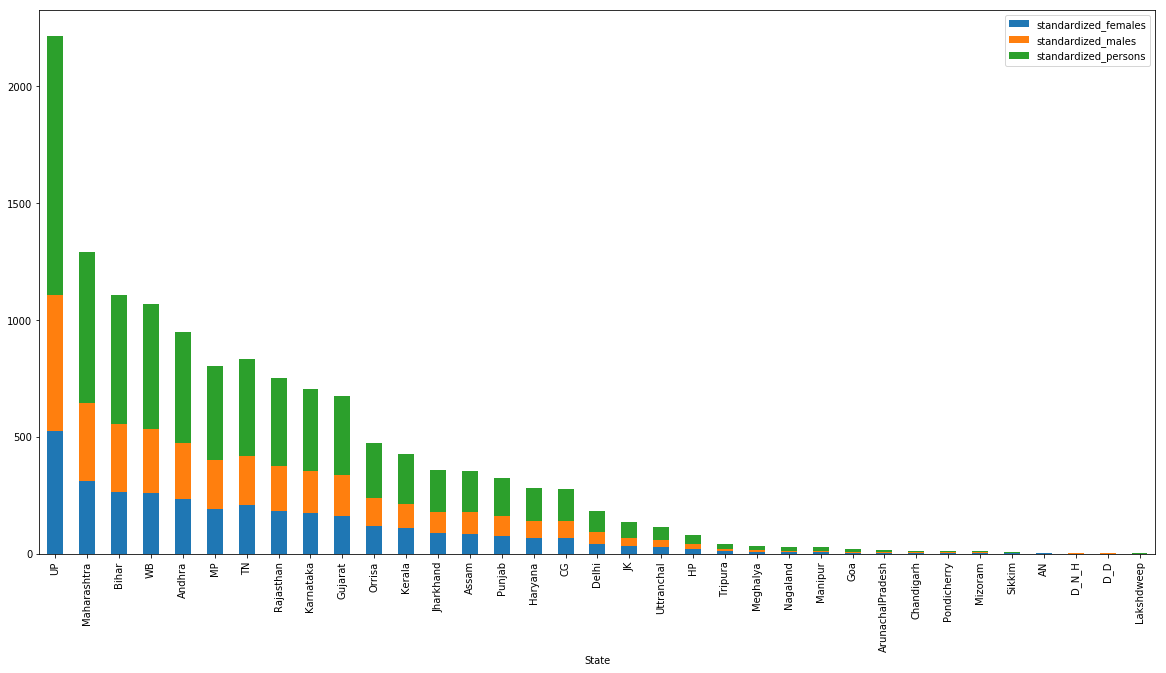

In [20]:
temp[["standardized_females","standardized_males","standardized_persons"]].sort_values(by="standardized_males",ascending=False).plot.bar(stacked=True,figsize=(20,10))

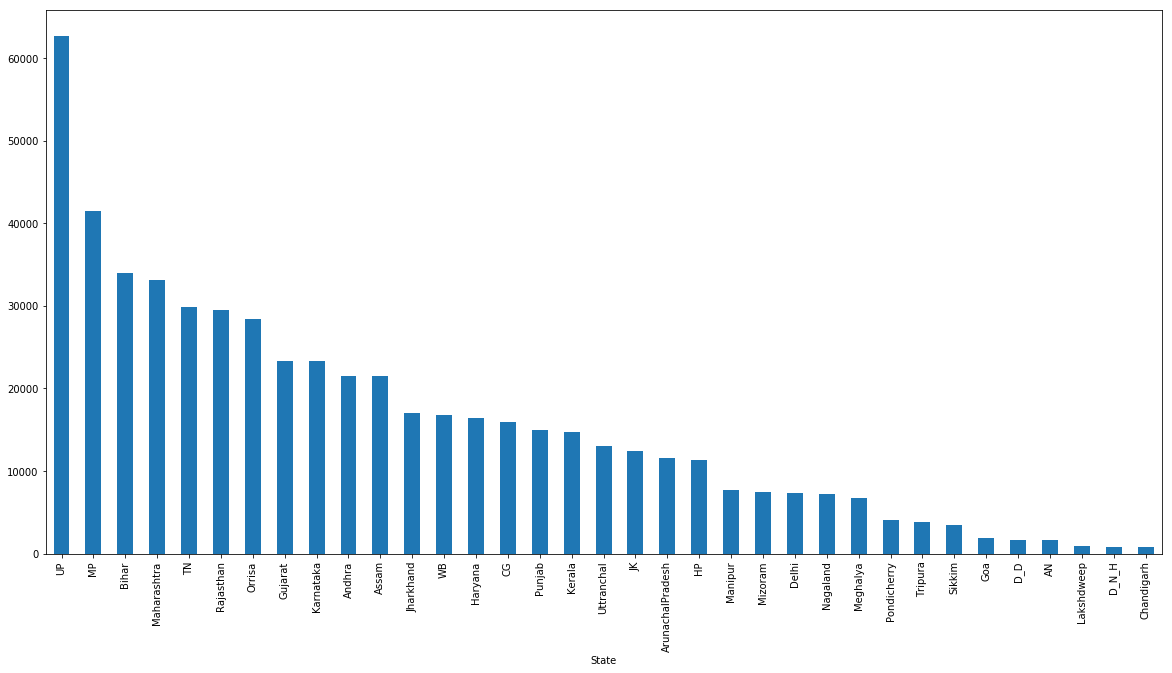

In [23]:
temp["Sex.ratio..females.per.1000.males."].sort_values(ascending=False).plot.bar(stacked=True,figsize=(20,10))

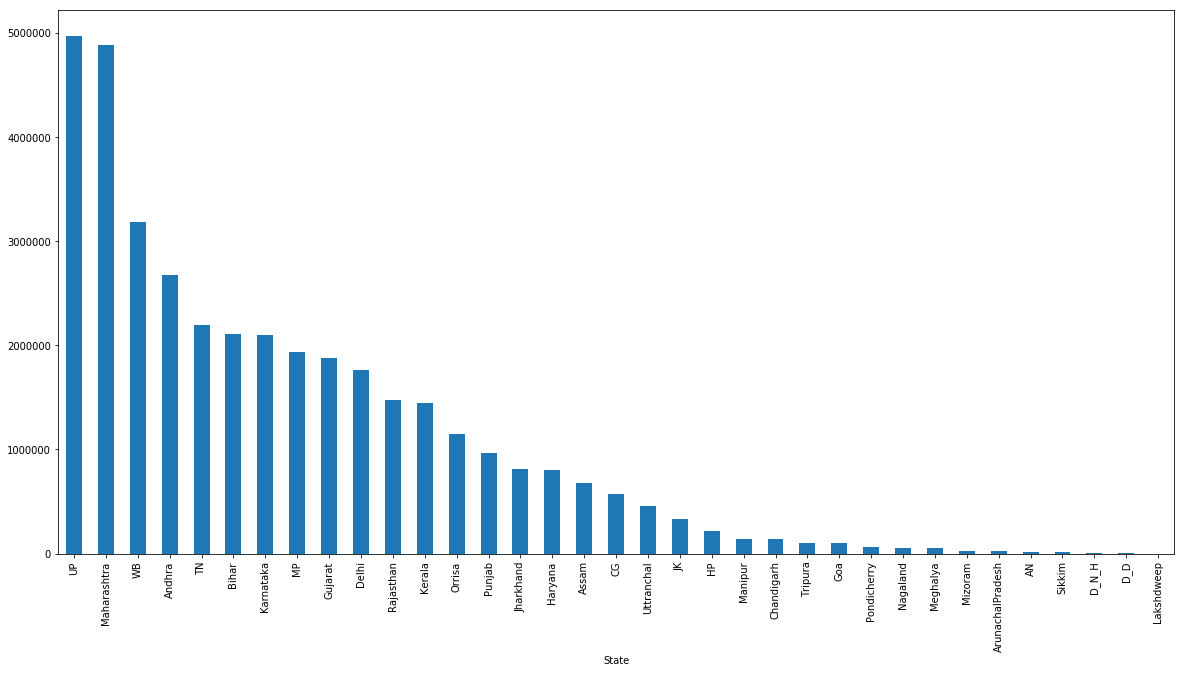

In [24]:
temp["Graduate.and.Above"].sort_values(ascending=False).plot.bar(stacked=True,figsize=(20,10))

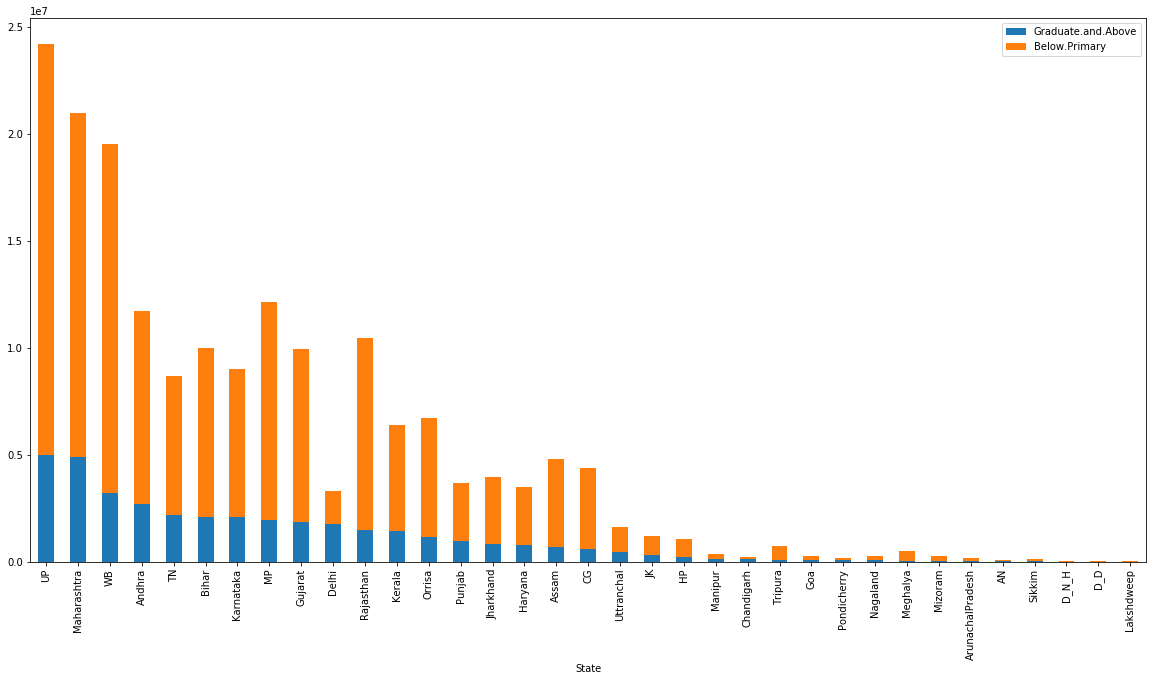

In [27]:
temp[["Graduate.and.Above","Below.Primary"]].sort_values(by="Graduate.and.Above",ascending=False).plot.bar(stacked=True,figsize=(20,10))

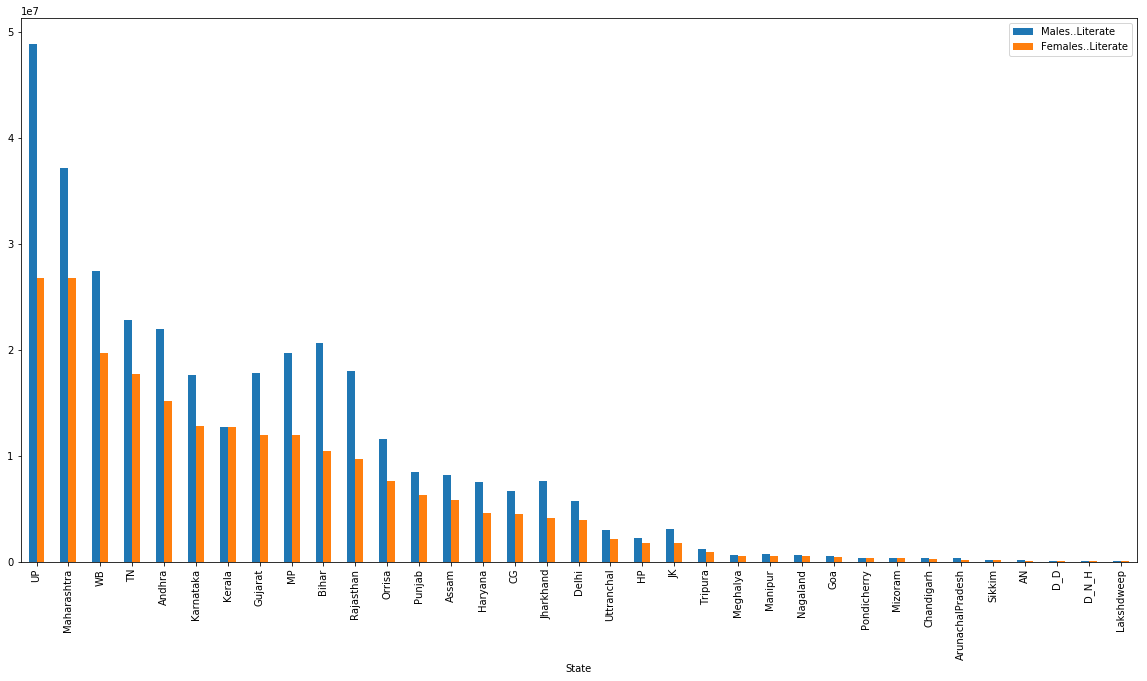

In [34]:
df2 = pd.DataFrame(np.array(temp[['Males..Literate', 'Females..Literate']]),
                   columns=['Males..Literate', 'Females..Literate'], index=temp.index)
df2.sort_values(by="Females..Literate",ascending=False).plot.bar(figsize=(20,10),stacked = False)

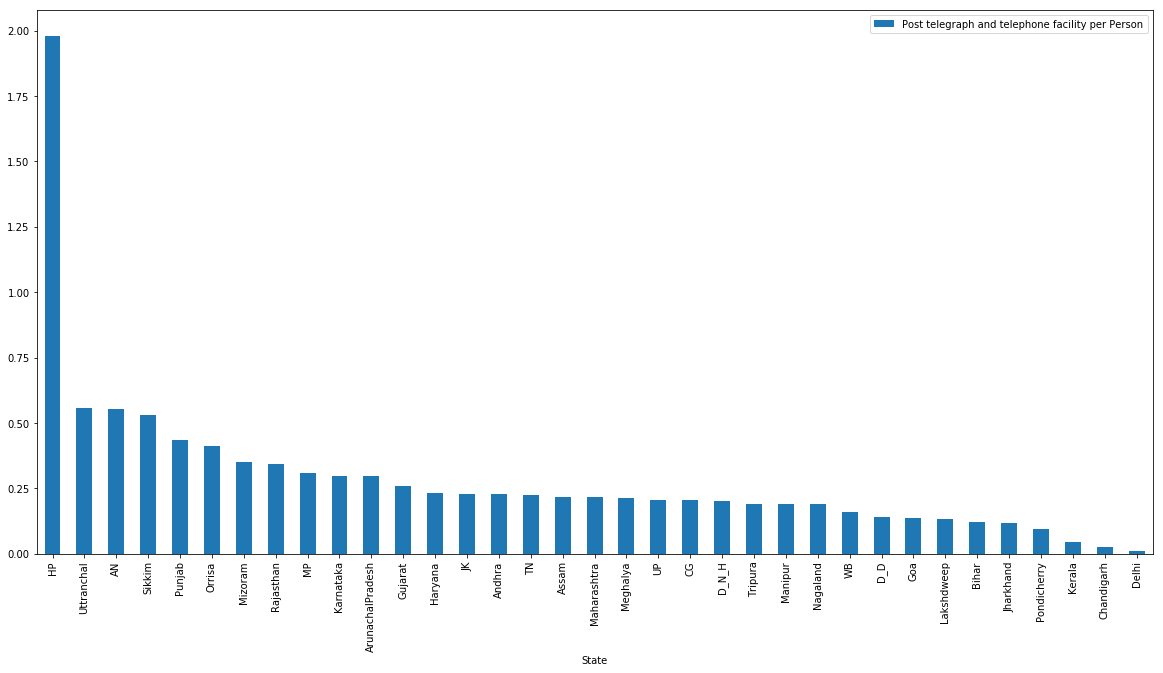

In [39]:
df2 = pd.DataFrame(temp['Post..telegraph.and.telephone.facility']/temp['Persons']*1000,
                   columns=['Post telegraph and telephone facility per Person'], index=temp.index)
df2.sort_values(by="Post telegraph and telephone facility per Person",ascending=False).plot.bar(figsize=(20,10),stacked = True)

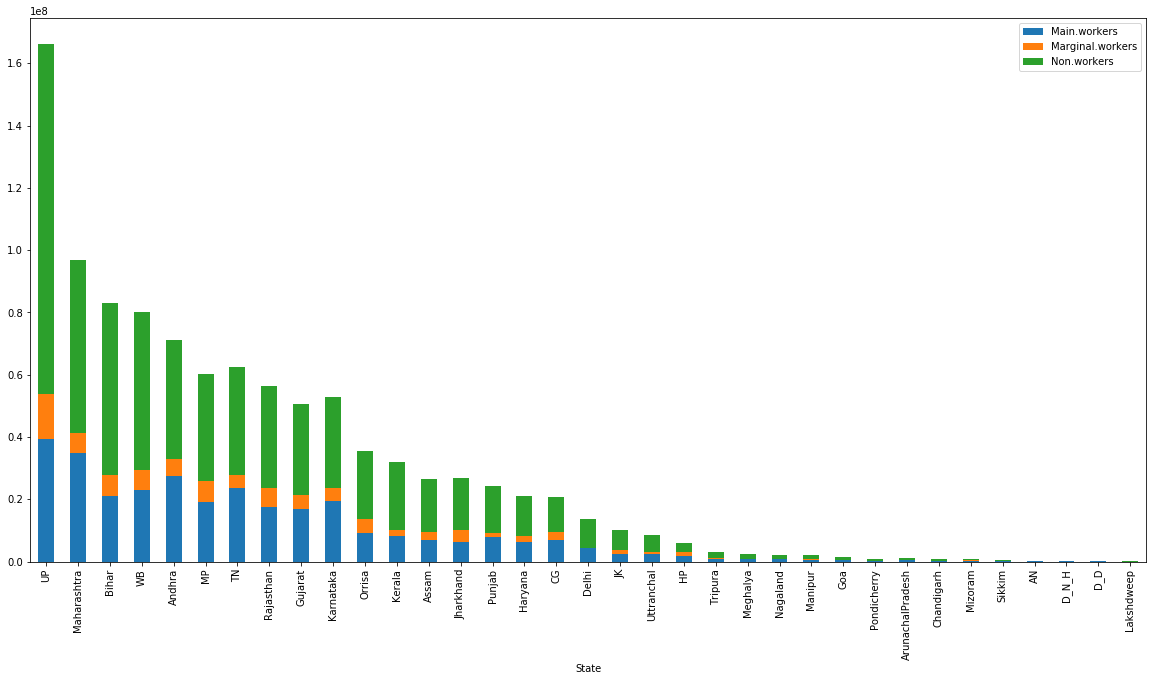

In [42]:
df2 = pd.DataFrame(np.array(temp[['Main.workers', 'Marginal.workers', 'Non.workers']]),
                   columns=['Main.workers', 'Marginal.workers', 'Non.workers'], index=temp.index)
df2.sort_values(by="Non.workers",ascending=False).plot.bar(figsize=(20,10),stacked = True)

In [43]:
df['Medical.facility']=df['Medical.facility'].fillna(0) # Removing all NaN values with Zero

In [44]:
type(df['Medical.facility'][1]) #type of value in Medical facity is 'String' so we need to convert it into INT

str

In [60]:
# df['Medical.facility'] = list(map(lambda x: int(df['Medical.facility'].to_list()),df['Medical.facility'].to_list()))

type(df['Medical.facility'][1])

map

Text(0.5, 1.0, 'Census India 2001')

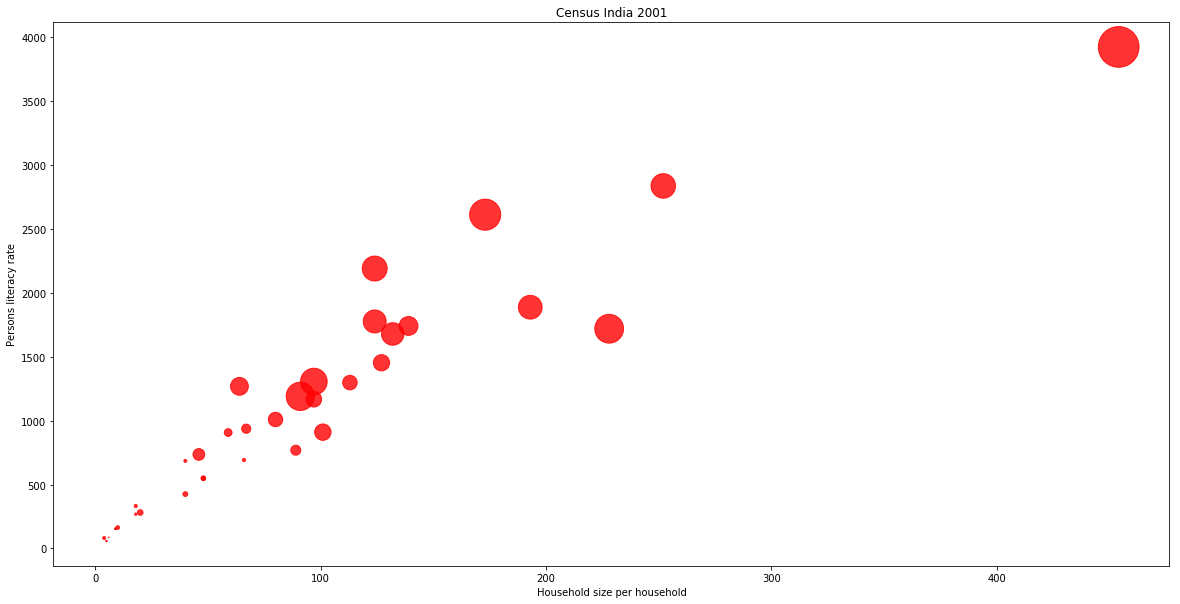

In [132]:
plt.figure(figsize=(20,10))
plt.scatter(x = temp['Household.size..per.household.'], y = temp['Persons..literacy.rate'],  s = np.array(temp['Persons'])/10**5, alpha = 0.8,color='r')
plt.xlabel('Household size per household')
plt.ylabel('Persons literacy rate')
plt.title('Census India 2001')

### It is not always true that Higher the literacy rate in state, more is the HouseHold size per house

Text(0.5, 1.0, 'Census India 2001')

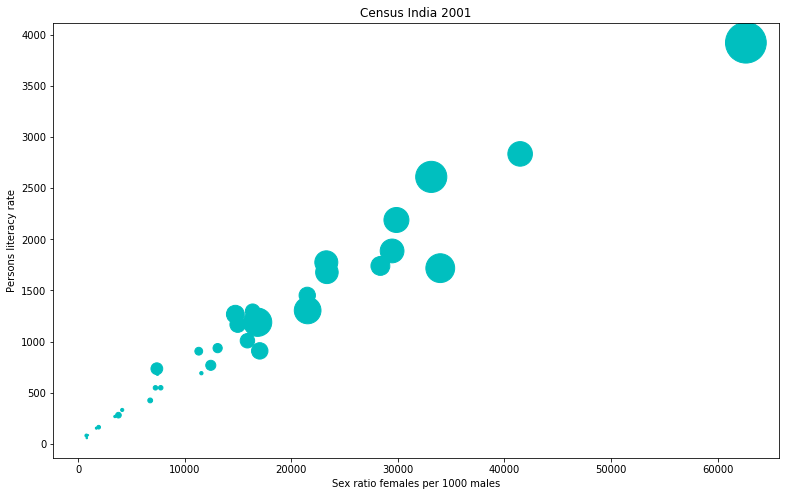

In [125]:
plt.figure(figsize=(13,8))
plt.scatter(x = temp['Sex.ratio..females.per.1000.males.'], y = temp['Persons..literacy.rate'],  s = np.array(temp['Persons'])/10**5, color='c')
plt.xlabel('Sex ratio females per 1000 males')
plt.ylabel('Persons literacy rate')
plt.title('Census India 2001')

### It is not always true that Higher the literacy rate in state, more is the sex-ratio

C:\Users\juet\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\juet\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


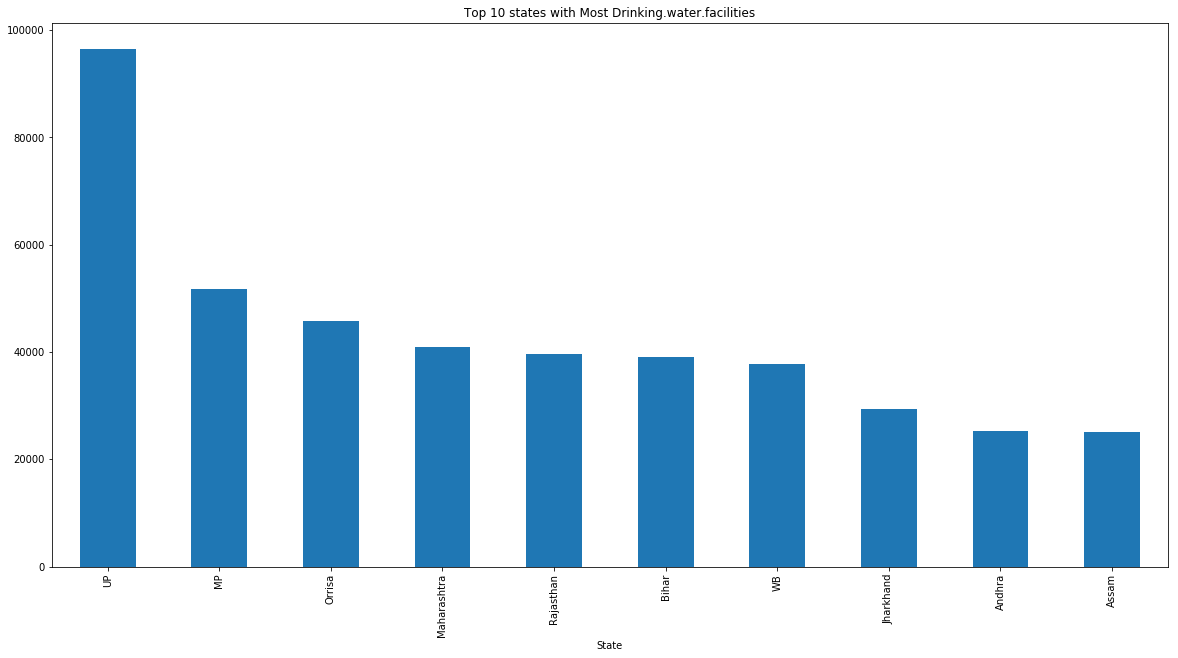

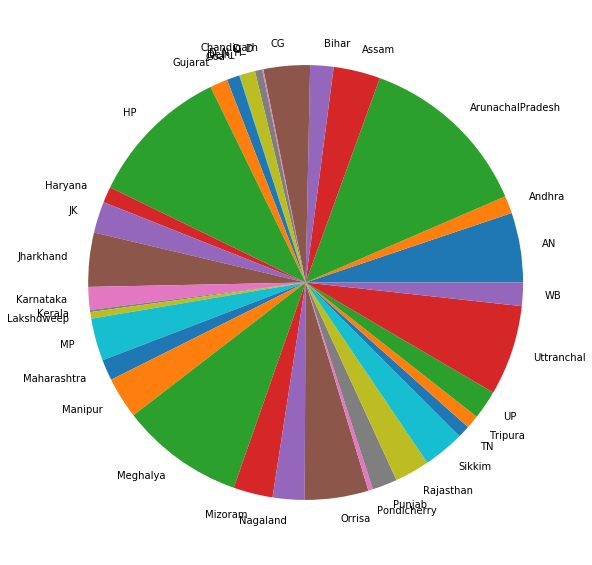

In [124]:
temp['Drinking.water.facilities'].sort_values(ascending=False).head(10).plot.bar(figsize=(20,10))
plt.title("Top 10 states with Most Drinking.water.facilities")
plt.figure(figsize=(20,10))
plt.pie(temp['Drinking.water.facilities'].values/temp['Persons']*10**4,labels=density.index)
plt.show()


# temp['Drinking.water.facilities'].plot.pie(figsize=(20,10))

### By seeing at the Bar Graph it might look like that UP and MP has more water facilities which is wrong because their WaterFacilities:People ratio is less.Therefore Meghalaya,HP,Uttranchal and Arunachal have more facilities per Ten-thousand people as shown in Pie chart

Text(0.5, 1.0, 'Top 10 states with Least Drinking.water.facilities')

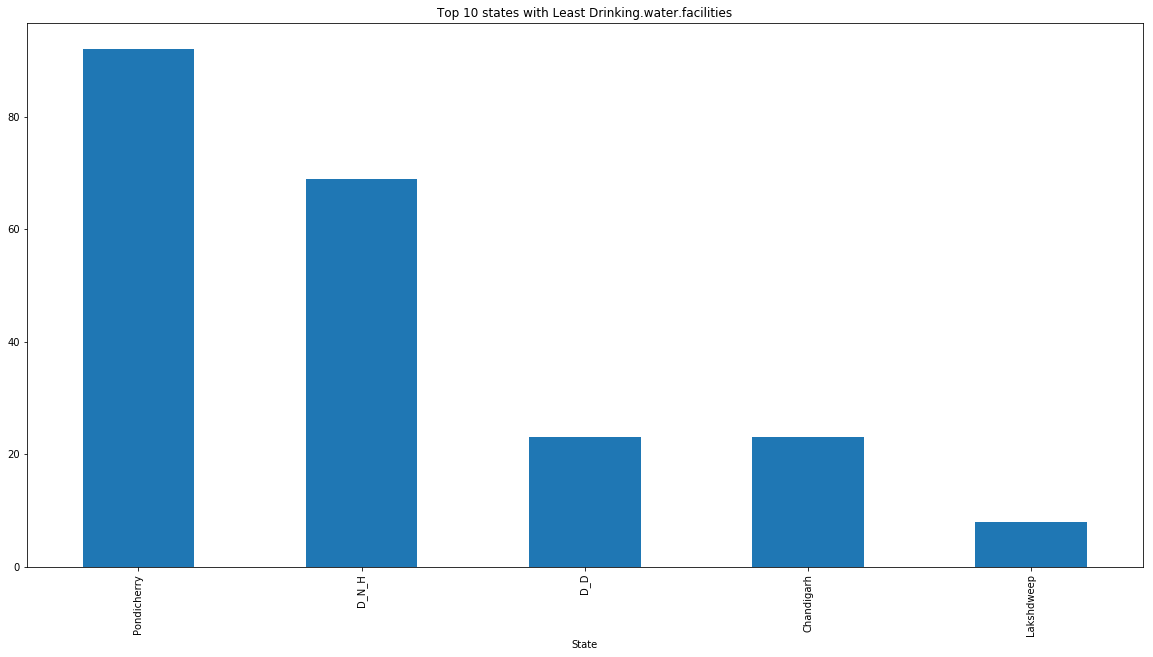

In [102]:
temp['Drinking.water.facilities'].sort_values(ascending=False).tail().plot.bar(figsize=(20,10))
plt.title("Top 5 states with Least Drinking.water.facilities")

C:\Users\juet\Anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


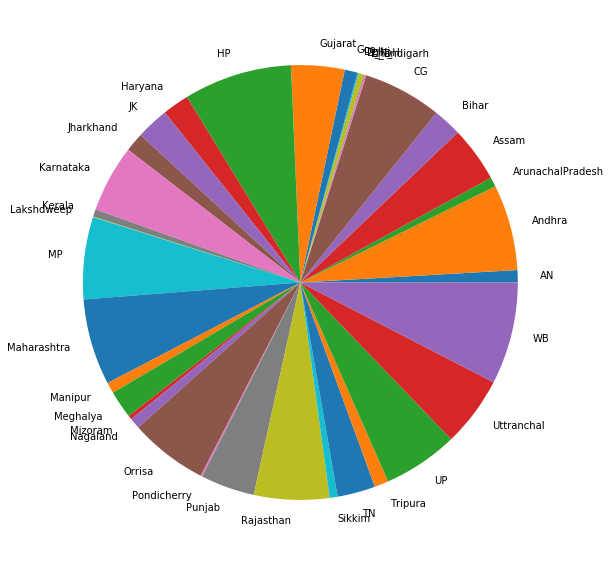

In [140]:
# temp[['Electricity..Power.Supply.','Safe.Drinking.water']].sort_values(by="Electricity..Power.Supply.",ascending=False).plot.bar(stacked=True,figsize=(20,10))
plt.figure(figsize=(20,10))
plt.pie(temp['Electricity..Power.Supply.'].values/(temp["Permanent.House"]+temp["Semi.permanent.House"]+temp["Temporary.House"])*10**4,labels=density.index)
plt.show()

# temp['Electricity..Power.Supply.']


### WB,HP,Maharashtra and Andhra are some of the states where the electricity supply per house are better than other states


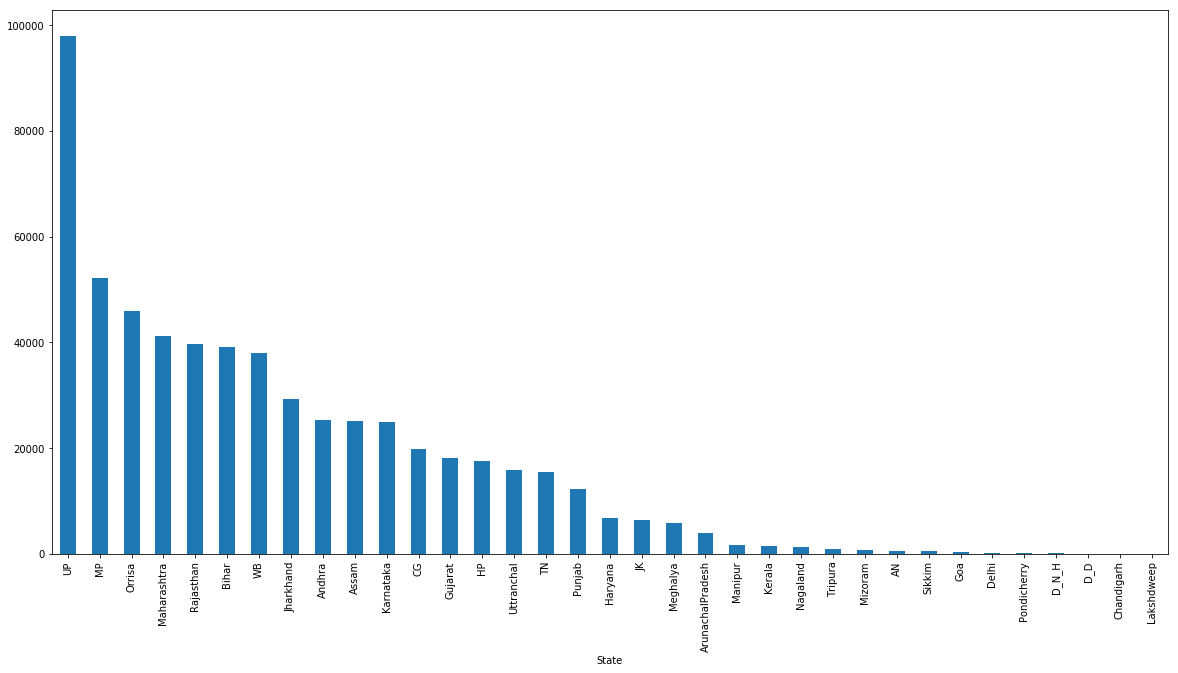

In [142]:
# plt.figure(figsize=(20,10))
# plt.pie(temp['Electricity..Power.Supply.'].values/(temp["Total.Inhabited.Villages"])*10**4,labels=density.index)
# plt.show()


temp['Total.Inhabited.Villages'].sort_values(ascending=False).plot.bar(figsize=(20,10))
# plt.title("Top 5 states with Least Drinking.water.facilities")

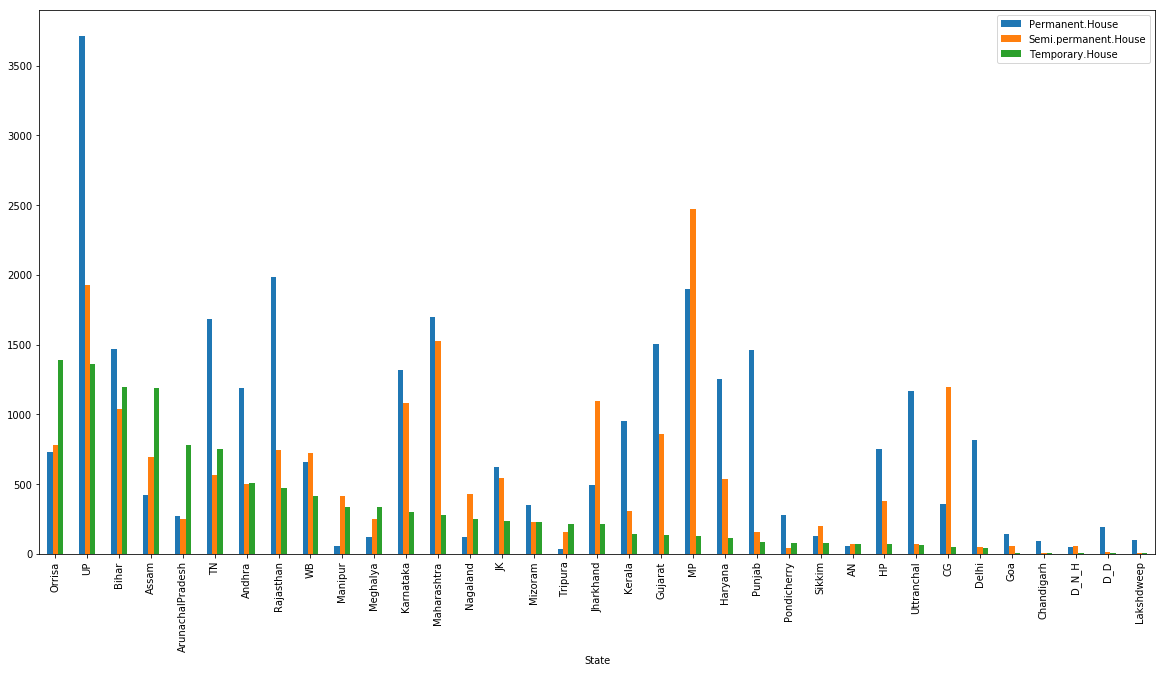

In [114]:
temp[['Permanent.House','Semi.permanent.House','Temporary.House']].sort_values(by="Temporary.House",ascending=False).plot.bar(stacked=False,figsize=(20,10))

### MP is having relatively good standard of housing than other states as most of the Houses are either Permanent or Semi-Permanent in the above chart

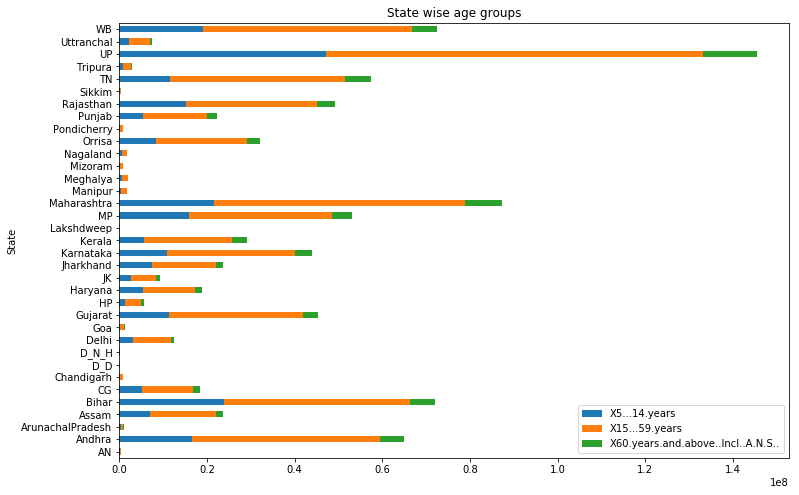

In [134]:
df3 = pd.DataFrame(np.array(temp[['X5...14.years', 'X15...59.years','X60.years.and.above..Incl..A.N.S..']]),columns=['X5...14.years', 'X15...59.years', 
                                  'X60.years.and.above..Incl..A.N.S..'], index=temp.index)
df3.plot.barh(figsize=(12,8),stacked = True,title="State wise age groups")

In [106]:
for col in (temp.columns):
    print(col)

X
Persons
Males
Females
Number.of.households
Household.size..per.household.
Sex.ratio..females.per.1000.males.
Sex.ratio..0.6.years.
Persons..literate
Males..Literate
Females..Literate
Persons..literacy.rate
Males..Literatacy.Rate
Females..Literacy.Rate
Total.Educated
Data.without.level
Below.Primary
Primary
Middle
Matric.Higher.Secondary.Diploma
Graduate.and.Above
X0...4.years
X5...14.years
X15...59.years
X60.years.and.above..Incl..A.N.S..
Total.workers
Main.workers
Marginal.workers
Non.workers
SC.1.Population
SC.2.Population
SC.3.Population
Religeon.1.Population
Religeon.2.Population
Religeon.3.Population
Imp.Town.1.Population
Imp.Town.2.Population
Imp.Town.3.Population
Total.Inhabited.Villages
Drinking.water.facilities
Safe.Drinking.water
Electricity..Power.Supply.
Primary.school
Post..telegraph.and.telephone.facility
Permanent.House
Semi.permanent.House
Temporary.House
standardized_persons
standardized_males
standardized_females


In [139]:
temp["Permanent.House"]+temp["Semi.permanent.House"]+temp["Temporary.House"]

State
AN                   199.80
Andhra              2199.40
ArunachalPradesh    1298.60
Assam               2299.40
Bihar               3699.90
CG                  1600.00
Chandigarh           100.00
D_D                  200.10
D_N_H                 99.90
Delhi                899.80
Goa                  200.00
Gujarat             2499.10
HP                  1199.60
Haryana             1899.60
JK                  1397.51
Jharkhand           1800.00
Karnataka           2698.70
Kerala              1399.00
Lakshdweep           100.00
MP                  4499.80
Maharashtra         3497.80
Manipur              799.90
Meghalya             699.40
Mizoram              799.70
Nagaland             799.60
Orrisa              2899.80
Pondicherry          399.90
Punjab              1700.30
Rajasthan           3198.70
Sikkim               399.80
TN                  2999.00
Tripura              399.80
UP                  6999.60
Uttranchal          1300.00
WB                  1799.20
dtype: float64